In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Dtype

In [4]:
df.LotFrontage.dtype

dtype('float64')

<font color='red'>Question:</font> What is **dtype** for?

### Dtype is used to find the datatype.


### A data type object (an instance of numpy.dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. It describes the following aspects of the data:

#### Type of the data (integer, float, Python object, etc.)

#### Size of the data (how many bytes is in e.g. the integer)

### Byte order of the data (little-endian or big-endian)

In [20]:
df.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [26]:
df.LotFrontage.count()

1201

In [25]:
len(df.LotFrontage)

1460

<font color='red'>Question:</font> What do "count" and "len" do? Why are their results different?

### Count returns  the number of elements in the Series /DataFrame after excluding the null/Nan values.
### i.e.Count non-NA cells for each column or row.


### whereas the len() gives the total number of elements in the series including the Nan values.

In [10]:
# hint: try the following
len(df[df['LotFrontage'].isna()].LotFrontage)

259

In [40]:
df[df['LotFrontage'].isna()].LotFrontage.count()

0

In [11]:
df[df['LotFrontage'].isna()].LotFrontage

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

### Using an example to differentiate bertween len and count()

In [44]:
import numpy as np
df1=pd.DataFrame([1,2,3,5,np.nan])
df2=pd.DataFrame([1,2,3,4,5,6])

#For df1, len and count return different results as it contains Nan.
print(len(df1))
print(df1.count())

#For df2, both len and count return the same result i.e. 6
print(len(df2))
df2.count()

5
0    4
dtype: int64
6


0    6
dtype: int64

# 2. Transform strings to numerical values

## 2.1 Function

**Example:** A funcition which transform a string to a numerical value

In [22]:
def HouseStyle2num(x):
    """
    This function transform HouseStyle string to numerical value.
    """
    if type(x) == str: # only works when x is a string
        if x == '1Story':
            return 1
        elif x == '2Story' or x == 'SFoyer' or x == 'SLvl':
            return 2
        elif x.startswith('1.5'):
            return 1.5
        elif x.startswith('2.5'):
            return 2.5
        else:
            return float('NaN')


**Example:** Test the function

In [23]:
HouseStyle2num('2Story')

2

## 2.2 Use above function for data transformation

**Example**: Apply the function elementwise using **map**.

In [24]:
df.HouseStyle.map(HouseStyle2num).head()

0    2.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: HouseStyle, dtype: float64

**Example**: Assign the new **Series** to a variable

In [25]:
story = df.HouseStyle.map(HouseStyle2num)

In [26]:
story.head()

0    2.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: HouseStyle, dtype: float64

**Example**: Add the new **Series** to **DataFrame**

In [28]:
df['story'] = df.HouseStyle.map(HouseStyle2num)

In [29]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,story
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2.0


# 3. Data Visualization

In [30]:
%matplotlib inline 

**Knowledge**: We are going to visualize data, matplotlib is built in pandas with this line, we don't need to import matplotlib explictly

**Example:** Visulizing distribution

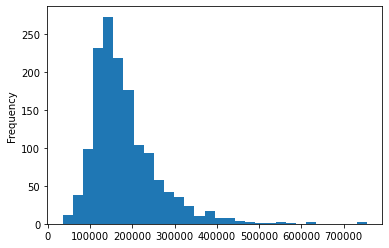

In [31]:
df.SalePrice.plot(kind='hist', bins=30)

**Example**: log scale to reveal more details

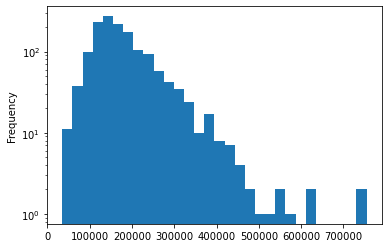

In [32]:
df.SalePrice.plot(kind='hist', bins=30, log=True) 

**Example**: Take Log of the **values** to remove the skewness

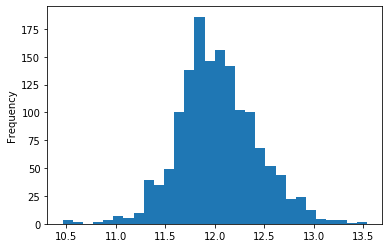

In [8]:
import numpy as np

df.SalePrice.map(np.log).plot(kind='hist', bins=30)

<font color='red'>Question:</font> What is **log-normal distribution**?

### In probability theory, a log-normal (or lognormal) distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution.

<font color='red'>Assignment:</font> Visualize **LotArea** and **GrLivArea**'s distributions

### Visualization of LotArea

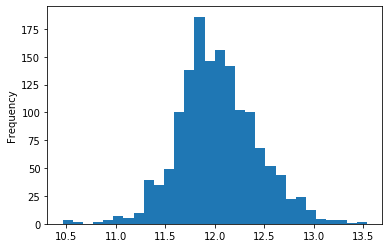

In [9]:
df.LotArea.map(np.log).plot(kind='hist', bins=30)

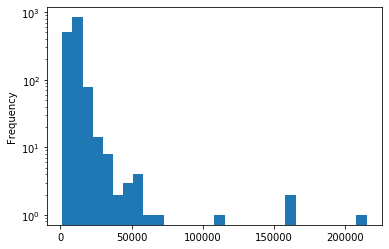

In [5]:
df.LotArea.plot(kind='hist', bins=30, log=True) 

### Visualization of GrLivArea

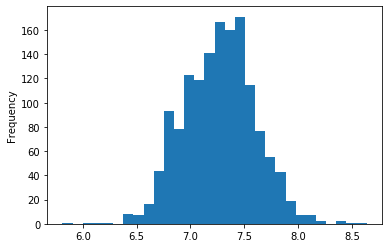

In [10]:
df.GrLivArea.map(np.log).plot(kind='hist', bins=30)

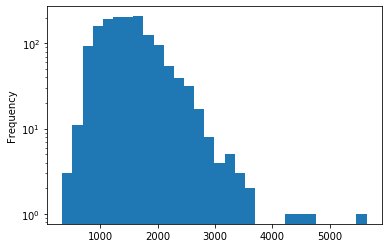

In [6]:
df.GrLivArea.plot(kind='hist', bins=30, log=True)